<a href="https://colab.research.google.com/github/GreigFodd/Network-Data-Generation-Vanilla-GAN/blob/main/evaluationClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classifier model previously created will now perform same classification on synthetically generated data. Results used for comparison. If evaluation metrics and confusion matrix are similar, will indicate GAN can be used to generate high quality network data.

In [1]:
import pandas as pd
import keras
import tensorflow as tf
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_real = pd.read_csv('/content/drive/MyDrive/Colab/ProjectData/data.csv')
df_benign_samples = pd.read_csv('/content/drive/MyDrive/Colab/ProjectData/generated_samples/gen_benign_samples.csv')
df_dosHulk_samples = pd.read_csv('/content/drive/MyDrive/Colab/ProjectData/generated_samples/gen_dosHulk_samples.csv')
df_sshPatator_samples = pd.read_csv('/content/drive/MyDrive/Colab/ProjectData/generated_samples/gen_sshPatator_samples.csv')
df_dosSlowloris_samples = pd.read_csv('/content/drive/MyDrive/Colab/ProjectData/generated_samples/gen_dosSlowloris_samples.csv')
df_heartbleed_samples = pd.read_csv('/content/drive/MyDrive/Colab/ProjectData/generated_samples/gen_heartbleed_samples.csv')
df_infiltration_samples = pd.read_csv('/content/drive/MyDrive/Colab/ProjectData/generated_samples/gen_infiltration_samples.csv')

In [4]:
df_benign_samples['label'] = 0
df_dosHulk_samples['label'] = 1
df_sshPatator_samples['label'] = 5
df_dosSlowloris_samples['label'] = 2
df_infiltration_samples['label'] = 4
df_heartbleed_samples['label'] = 3

In [5]:
df_benign_samples = df_benign_samples.drop('Unnamed: 0', axis=1)
df_dosHulk_samples = df_dosHulk_samples.drop('Unnamed: 0', axis=1)
df_sshPatator_samples = df_sshPatator_samples.drop('Unnamed: 0', axis=1)
df_dosSlowloris_samples = df_dosSlowloris_samples.drop('Unnamed: 0', axis=1)
df_infiltration_samples = df_infiltration_samples.drop('Unnamed: 0', axis=1)
df_heartbleed_samples = df_heartbleed_samples.drop('Unnamed: 0', axis=1)

In [6]:
# combine all generated samples into one dataframe for classification

df_synthetic = pd.concat([df_benign_samples, df_dosHulk_samples, df_sshPatator_samples, df_dosSlowloris_samples, df_heartbleed_samples, df_infiltration_samples], axis= 0)

In [7]:
df_synthetic['label'].value_counts()

0    1170495
1      70302
5       2922
2       2332
3         11
4          4
Name: label, dtype: int64

In [8]:
df_real.label.value_counts()

0    1170722
1      70619
5       2922
2       2332
3         11
4          4
Name: label, dtype: int64

In [9]:
df_real['label'] = df_real['label'].astype('category').cat.codes

In [10]:
df_real.label.value_counts()

0    1170722
1      70619
5       2922
2       2332
3         11
4          4
Name: label, dtype: int64

In [11]:
df_synthetic['label'] = df_synthetic['label'].astype('category').cat.codes

In [12]:
df_synthetic['label'].value_counts()

0    1170495
1      70302
5       2922
2       2332
3         11
4          4
Name: label, dtype: int64

In [13]:
X_real = df_real.drop('label', axis=1)
y_real = df_real.label
X_syn = df_synthetic.drop('label', axis = 1)
y_syn = df_synthetic.label

In [14]:
from sklearn.preprocessing import PowerTransformer
pw= PowerTransformer(method='yeo-johnson', standardize=True, copy=True)

In [15]:
X_real = pw.fit_transform(X_real[X_real.columns])

In [16]:
X_real = pd.DataFrame(X_real)

In [17]:
X_syn = pw.fit_transform(X_syn[X_syn.columns])

In [18]:
X_syn = pd.DataFrame(X_syn)

In [19]:
X_real.columns = ['init_win_bytes_fwd', 'subflow_fwd_bytes',
       'total_length_of_fwd_packets', 'fwd_packet_length_std',
       'bwd_packet_length_std', 'flow_iat_mean', 'fwd_iat_min', 'flow_iat_std',
       'flow_duration', 'active_mean', 'fwd_psh_flags', 'syn_flag_count',
       'fwd_packets_s']

In [21]:
from keras.utils import np_utils

y_real_oh = pd.DataFrame(y_real)
y_syn_oh = pd.DataFrame(y_syn)

y_real_oh = keras.utils.np_utils.to_categorical(y_real_oh)
y_syn_oh = keras.utils.np_utils.to_categorical(y_syn_oh)

In [ ]:
#X_syn = X_syn.sample(frac=1).reset_index(drop=True)

In [22]:
from sklearn.model_selection import train_test_split
X_syn_train, X_syn_test, y_syn_oh_train, y_syn_oh_test = train_test_split(X_syn, y_syn_oh, test_size = 0.3, random_state = 5)

In [23]:
from sklearn.model_selection import train_test_split
X_real_train, X_real_test, y_real_oh_train, y_real_oh_test = train_test_split(X_real, y_real_oh, test_size = 0.3, random_state = 5)

In [ ]:
#print("training unique values:",y_syn_oh_train.value_counts(), y_real_oh_train.value_counts(), "test unique values", y_syn_oh_test.value_counts(), y_real_oh_test.value_counts())

In [24]:
X_syn_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
421050,-0.435897,0.389251,0.392915,-0.363805,-0.248593,0.112089,0.080325,0.224939,0.201603,-0.280585,-0.461942,-0.211666,-0.122455
272176,-0.316938,0.315148,0.307145,-0.285898,-0.142671,0.228396,0.071187,0.255537,0.282163,-0.211907,-0.335341,-0.116093,-0.195112
163708,-0.226811,0.308992,0.265401,-0.147660,-0.255510,0.162353,1.344224,0.202259,0.198814,-0.130232,-0.302622,-0.059002,-0.159128
569977,-0.296381,0.187766,0.207382,-0.061749,-0.152981,0.136355,-0.484977,0.345615,0.220339,-0.082358,-0.225930,-0.054660,-0.149771
368906,-0.343095,0.306321,0.313555,-0.122207,-0.115501,0.226355,0.585080,0.254748,0.283525,-0.164202,-0.266761,-0.216472,-0.220456


**-------------------------------------------------------**

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model = Sequential()
model.add(Dense(24, input_dim=13, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#return model

**-------------------------------------------------------**

In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight('balanced' , np.unique(y_real), y_real)
class_weights = dict(enumerate(class_weights))

history = model.fit(X_real_train, y_real_oh_train, batch_size = 512, class_weight=class_weights, verbose=2, epochs = 50, validation_split = 0.2)

In [27]:
score, acc = model.evaluate(X_real_test, y_real_oh_test ,verbose=2, batch_size= 512)

731/731 - 1s - loss: 0.0695 - accuracy: 0.9745


In [29]:
yhat_probs= model.predict(X_real_test)
yhat_classes= np.argmax(yhat_probs, axis=1)

In [30]:
yhat_classes = pd.DataFrame(yhat_classes)
yhat_classes.value_counts()

0    341823
1     25575
5      3973
2      2589
4        18
3         5
dtype: int64

In [31]:
y_test_rounded = np.argmax(y_real_oh_test, axis=1)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_rounded, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test_rounded, yhat_classes, average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test_rounded, yhat_classes, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test_rounded, yhat_classes, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.974510
Precision: 0.986608
Recall: 0.974510
F1 score: 0.978988


In [ ]:
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
import seaborn as sn

labels = [0, 1, 2, 3, 4, 5]

cm = confusion_matrix(y_test_rounded, yhat_classes, labels)
#print(cm)

df_cm = pd.DataFrame(cm, range(6), range(6))
sn.set(font_scale=1.4)

plt.figure(figsize = (50,50))
sn.heatmap(df_cm, annot=True)

plt.show()


In [ ]:
class_weights = class_weight.compute_class_weight('balanced' , np.unique(y_syn), y_syn)
class_weights = dict(enumerate(class_weights))

history = model.fit(X_syn_train, y_syn_oh_train, batch_size = 512, class_weight=class_weights, epochs = 50, verbose = 2, validation_split = 0.2)

model seems to be overfitting somewhere? training same model twice on same execution?

In [37]:
# trained with synthetic data so now test with real data
score, acc = model.evaluate(X_real_test, y_real_oh_test ,verbose=2, batch_size= 512)

731/731 - 1s - loss: 4.4604 - accuracy: 0.8055


In [39]:
yhat_probs= model.predict(X_real_test)
yhat_classes= np.argmax(yhat_probs, axis=1)


In [40]:
yhat_classes = pd.DataFrame(yhat_classes)
yhat_classes.value_counts()

0    301673
1     67774
5      4311
2       225
dtype: int64

In [41]:
y_test_rounded = np.argmax(y_real_oh_test, axis=1)

In [42]:
accuracy = accuracy_score(y_test_rounded, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test_rounded, yhat_classes, average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test_rounded, yhat_classes, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test_rounded, yhat_classes, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.805462
Precision: 0.912788


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.805462
F1 score: 0.849012


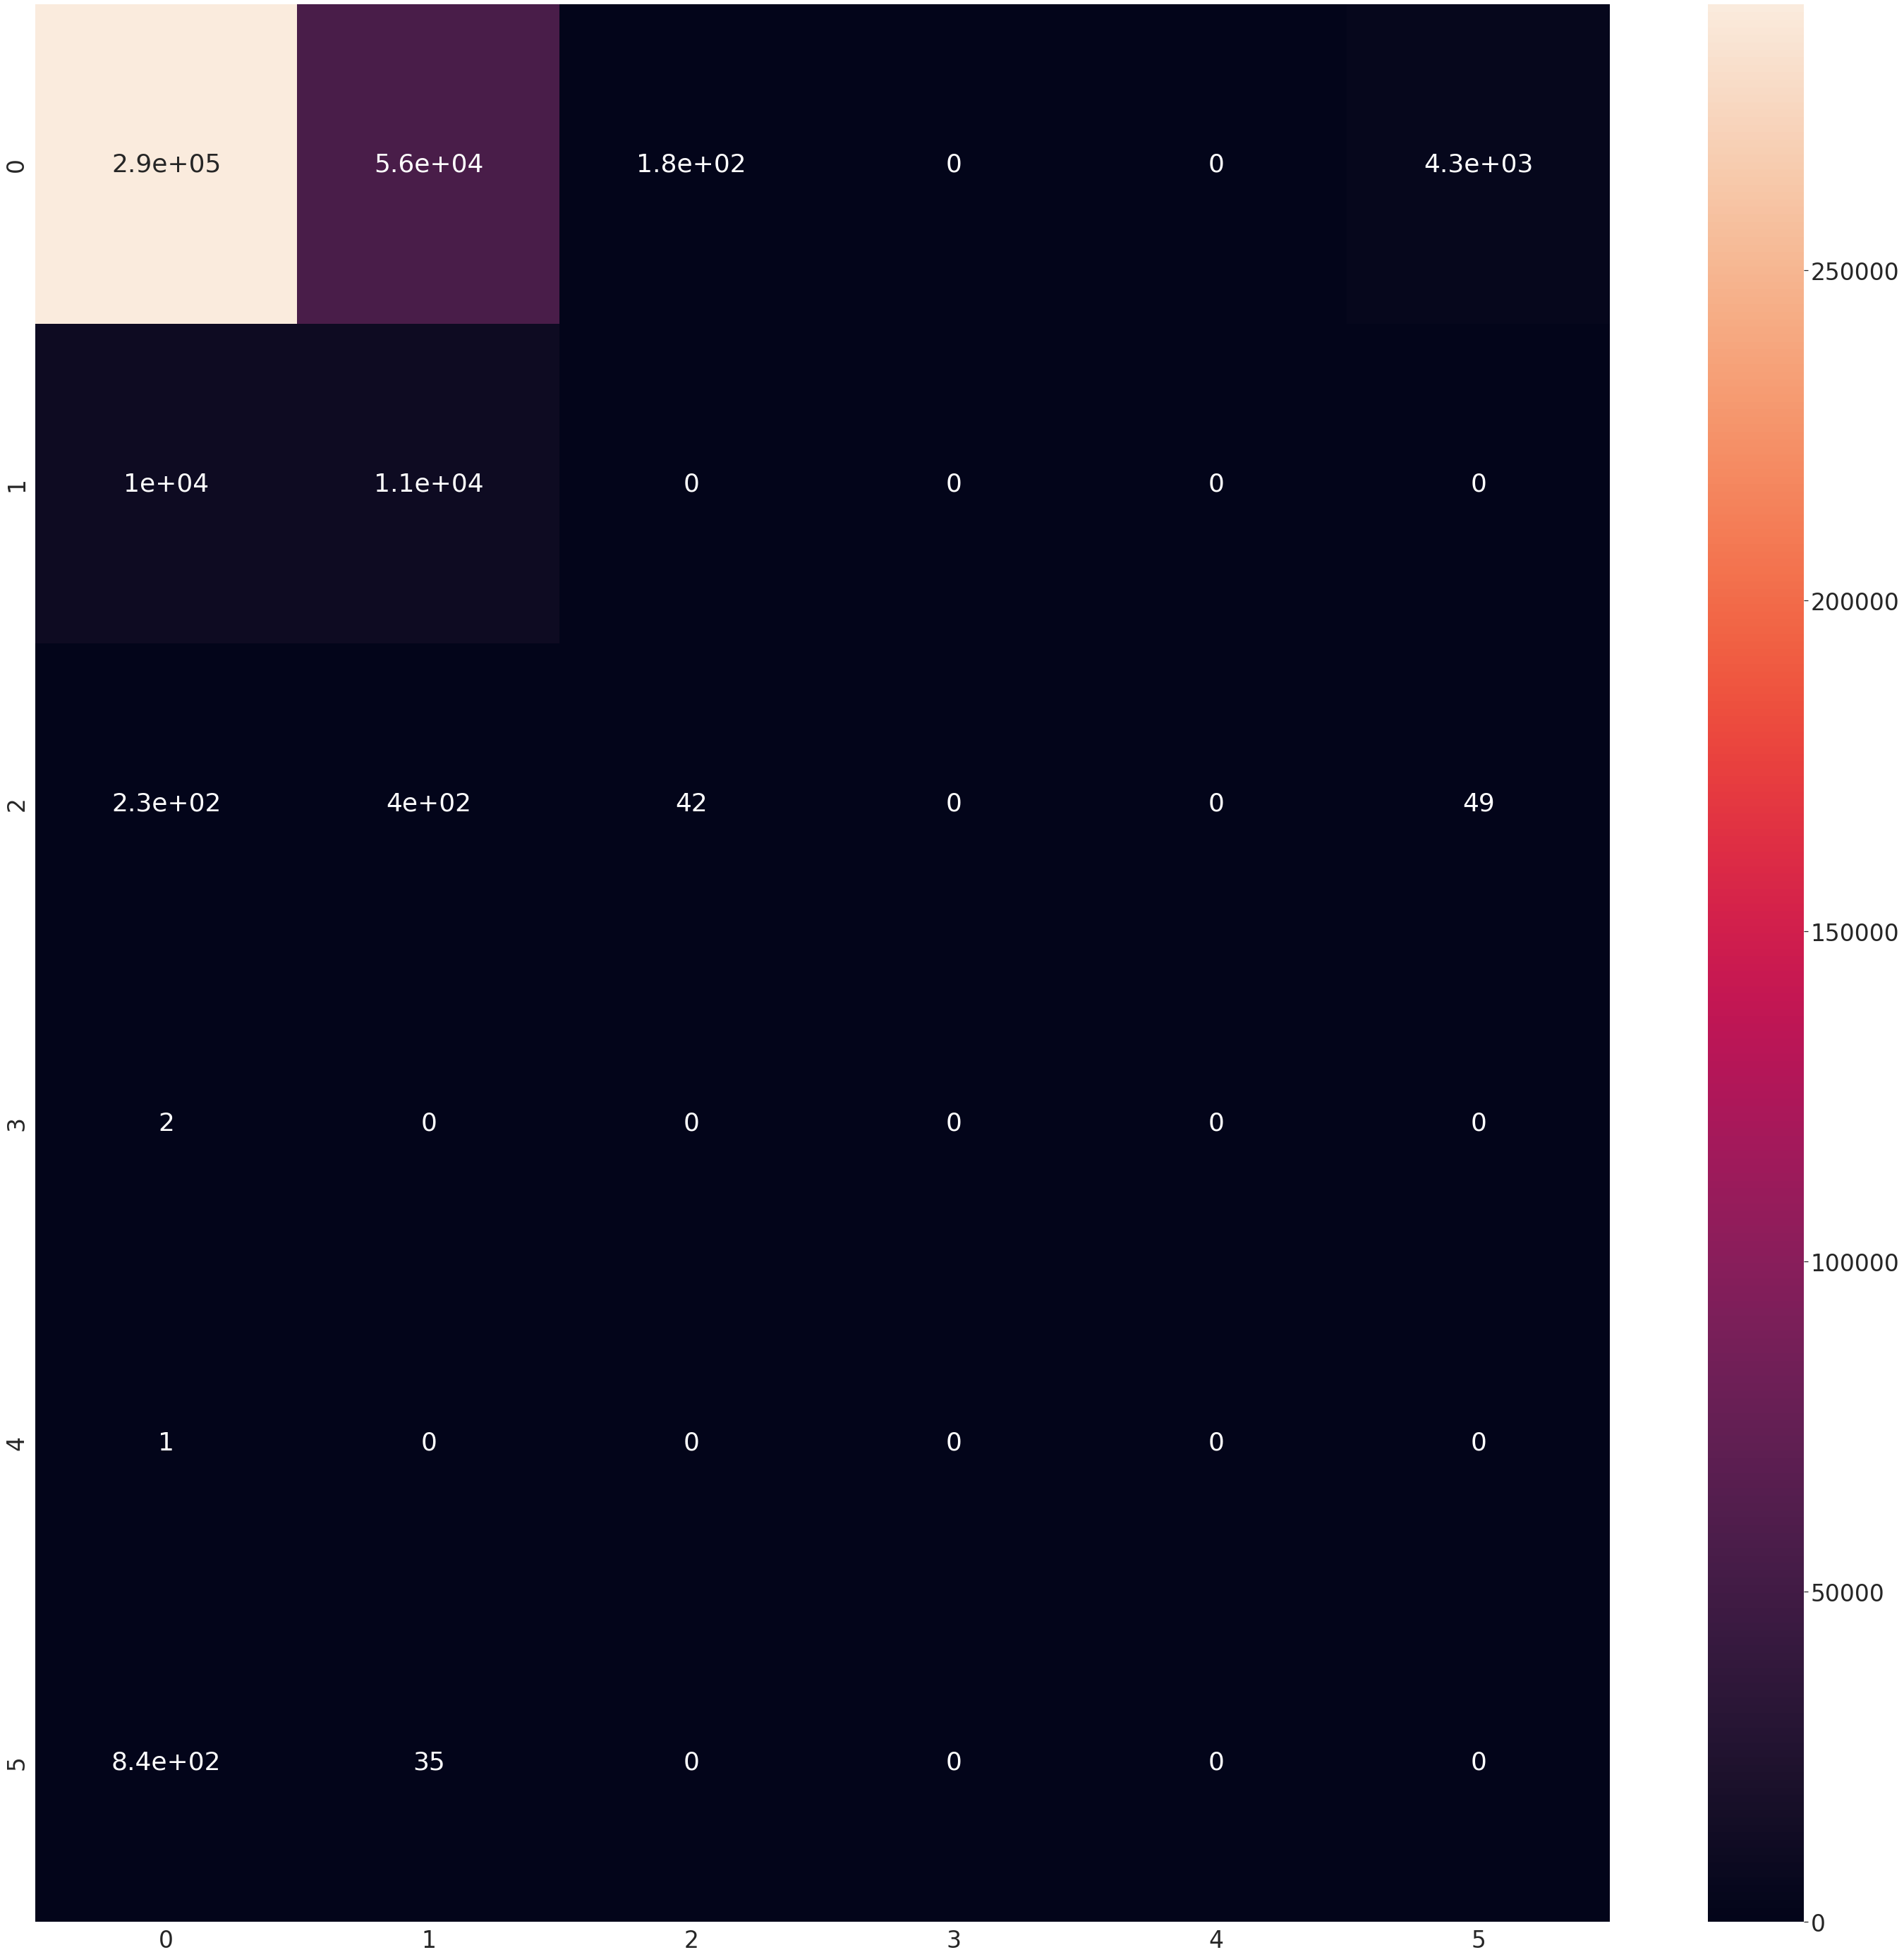

In [44]:
labels = [0, 1, 2, 3, 4, 5]

cm = confusion_matrix(y_test_rounded, yhat_classes, labels)
#print(cm)

df_cm = pd.DataFrame(cm, range(6), range(6))
sn.set(font_scale=3)

plt.figure(figsize = (50,50))
sn.heatmap(df_cm, annot=True)

plt.show()


results discussed in dissertation. model shows deceptively high evaluation metrics due to performing well at classifying specific classes, which has the high number of samples. suggests this vanilla GAN model struggles at generating synthetic data if sample sizes are too low. discuss further.